# Assignment 2: Linear Regression

## Janelle Domantay   
## Dylan Obata

## Dataset and Source
For our project, we used The Complete Pokemon Dataset found on Kaggle. https://www.kaggle.com/rounakbanik/pokemon

## Characteristics
Our dataset has 13 features, consisting of:
* 6 Categorical Features (#, Name, Type 1, Type 2, Generation, and Legendary)
* 7 Quantatative Features (Total, HP, Attack, Defense, Sp. Atk, Sp Def. Defense, and Speed)

In [1]:
import pandas as pd #data analysis library
import matplotlib.pyplot as plt #graphing
import seaborn as sns #graphing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn import metrics
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

poke_df = pd.read_csv("Pokemon.csv")
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Data Preprocessing
In order to apply regression, we had to remove the categorical data features 
* #
* Name
* Type 1
* Type 2
* Generation
* Legendary

Additionally, we removed the quantatative features 
* Special Attack
* Special Defense

In order to reduce the dimensionality of our data.

In [2]:
poke_stats = ['HP', "Attack", "Defense", "Speed"]
poke_df = poke_df.drop(columns = ['#','Name', 'Type 1', 'Type 2', 'Total', 'Sp. Atk', 'Sp. Def', 'Generation', "Legendary"])
poke_df.head()

,HP,Attack,Defense,Speed
0,45,49,49,45
1,60,62,63,60
2,80,82,83,80
3,80,100,123,80
4,39,52,43,65


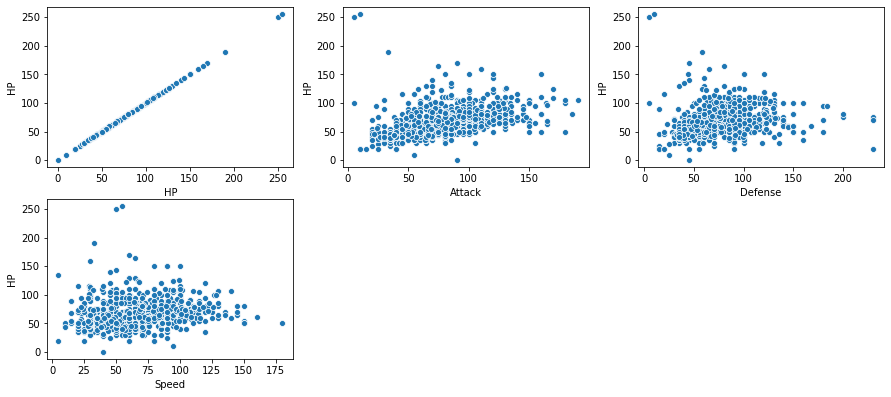

In [3]:
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(poke_stats):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=poke_df, x=i[1], y = 'HP')

In [4]:
#preprocessing independent variables
x = poke_df.iloc[:,1:4] 
atk = poke_df.iloc[:,1]
dfs = poke_df.iloc[:,2]
spd = poke_df.iloc[:,3]
x

,Attack,Defense,Speed
0,49,49,45
1,62,63,60
2,82,83,80
3,100,123,80
4,52,43,65
...,...,...,...
795,100,150,50
796,160,110,110
797,110,60,70
798,160,60,80


In [5]:
#preprocessing dependent variables
y = poke_df.iloc[:,0]
print(y)

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64


In [6]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) #20% testing

# Linear Regression with Ordinary Least Squares

**For the Ordinary Least Squares Model, we had to add the constant term parameter vector.**

In [7]:
x_train = sm.add_constant(x_train) #add constant term

## Results for Ordinary Least Square Model
After running the OLS model on our dataset we see that the linear equation that best fits our data is given by

$\hat{w} = 0.2940x_1 + 0.0421x_2 + 0.0089x_3 + 37.2368$

where the bias is 37.2368.

We also provide relevant metrics:
* $r^2=0.16$
* Absolute Error for Training Set = 15.291428398303669
* Mean Square Error for Training Set = 534.7590917537507
* Root Mean Square Error for Training Set = 23.12485874019019

* Absolute Error for Test Set = 16.501750718281876
* Mean Square Error for Test Set = 719.8984189650921
* Root Mean Square Error for Test Set = 26.830922812402335

Our low $r^2$ value shows that the data was not well modeled by linear regression.

In [8]:
result = sm.OLS(y_train, x_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     42.97
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           2.70e-25
Time:                        14:25:37   Log-Likelihood:                -2940.8
No. Observations:                 640   AIC:                             5890.
Df Residuals:                     636   BIC:                             5907.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.1377      3.296     12.480      0.000      34.665      47.611
Attack         0.2933      0.036      8.104      0.000       0.222       0.364
Defense        0.0479      0.035      1.368      0.172      -0.021       0.117
Speed          0.0284      0.036      0.786      0.432      -0.043       0.099
==============================================================================
Omnibus:                      461.298   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10623.772
Skew:                           2.909   Prob(JB):                         0.00
Kurtosis:                      22.093   Cond. No.                         466.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

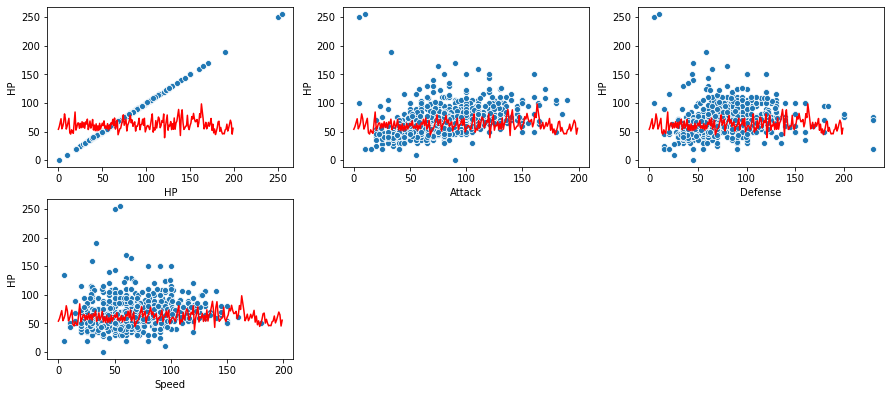

In [9]:
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(poke_stats):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=poke_df, x=i[1], y = 'HP')
    px = np.arange(0,200,1)
    bias = 37.2368
    py = (0.2940 * atk[px]) + (.0421 * dfs[px]) + (.0089*spd[px]) + bias
    plt.plot(py, 'r')
    plt.show
    
#g(x) = 0.2940*x_1 + 0.0421*x_2 + 0.0089*x_3 + 37.2368

In [10]:
ypred = result.predict(x_train)
print("The Absoulte Error for the Training set is", 
    metrics.mean_absolute_error(y_train, ypred)) #Absolute error

print("The Mean Squared Error for the Training set is", 
      metrics.mean_squared_error(y_train, ypred)) #MSE

print("The Root Mean Squared Error for the Training set is",
      np.sqrt(metrics.mean_squared_error(y_train,ypred))) #RMSE

The Absoulte Error for the Training set is 15.93905735969481
The Mean Squared Error for the Training set is 573.69453960333
The Root Mean Squared Error for the Training set is 23.951921417776276


In [11]:
x_test = sm.add_constant(x_test)
ypred = result.predict(x_test)
print(ypred)
print(y_test)

345    57.427989
66     65.878517
149    58.657132
581    62.432835
145    64.927914
         ...    
115    77.884601
91     70.360659
402    78.154058
222    70.585790
751    64.696735
Length: 160, dtype: float64
345     70
66      65
149     35
581     45
145    130
      ... 
115     50
91      35
402     55
222     65
751     60
Name: HP, Length: 160, dtype: int64


In [12]:
#calculating errors
print("The Absolute Error for the Test set is"
      ,metrics.mean_absolute_error(y_test, ypred))#Absolute error
print("The Mean Squared Error for the Test set is",
      metrics.mean_squared_error(y_test, ypred))#MSE
print("The Root Mean Squared Error for the Test set is",
      np.sqrt(metrics.mean_squared_error(y_test,ypred)))

The Absolute Error for the Test set is 14.304824020682483
The Mean Squared Error for the Test set is 368.3849669637516
The Root Mean Squared Error for the Test set is 19.19335736560312


# Linear Regression with Gradient Descent

In [13]:
#gradient descent
sgdr = SGDRegressor(max_iter = 1000,penalty = "elasticnet",loss = 'huber',tol = 1e-3, average = True, learning_rate = 'constant')
sgdr.fit(x_train, y_train)

SGDRegressor(alpha=0.0001, average=True, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='huber', max_iter=1000,
             n_iter_no_change=5, penalty='elasticnet', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

## Results for Linear Regression with Gradient Descent

After running the LR with Gradient Descent model on our dataset we see that the linear equation that best fits our data is given by

$\hat{w} =  0.36384525x_1 + 0.27076375x_2 + 0.25237602x_3 + 0.29716996$

where the bias is 0.29716996.


We also provide relevant metrics:
* Mean Absolute Error for the Training set is 16.58126437534663
* Mean Squared Error for the Training set is 678.9338650222622
* Root Mean Squared Error for the Training set is 26.05635939693537
* Mean Absolute Error for the Test set is 15.120392095929683
* Mean Squared Error for the Test set is 569.9625798593513
* Root Mean Squared Error for the Test set is 23.873889081156243


Iterations until Convergence: 7

Learning Rate: 0.01


In [14]:
lgpred = sgdr.predict(x_test)
print(lgpred)

[ 40.74596916  64.52657451  50.97566883  50.36865751  57.08054569
  71.45021119  40.34759035  42.82927187  44.38038743  89.40548313
  63.18720745  64.0428422   79.32998927  63.28519488  79.78743217
  62.0839098   75.38715258  67.08103515  97.4334884   74.8001919
  45.042723    62.49858247  62.11330163 111.1171247   71.56103308
  71.19223305  70.7488588  123.67117393  72.88169409  80.90542574
  77.66537614  56.93311916  82.03811521  61.33471626  52.13464771
  57.78082713  62.8936719  110.35145033  64.43847557  43.98601875
 119.64016176  74.50656966  95.61235076  94.75296938  49.75166758
  58.80340868  36.65420146  65.5577101   47.56770176  84.90044018
  49.29510867  45.02169826  91.79718054  91.20879193  72.38417358
  94.03736476  72.79357822  65.80847542  74.8001919   38.52317348
  87.73329342  50.30602697  46.70501743  52.76890897  31.88690676
  52.01661301  57.68541512  38.21947915  58.73927367  80.68405224
  64.27731366  58.78871277  58.48289348  62.74624537  42.61093104
  48.896916

In [15]:
metrics.r2_score(y_test, lgpred)

0.11024407008997494

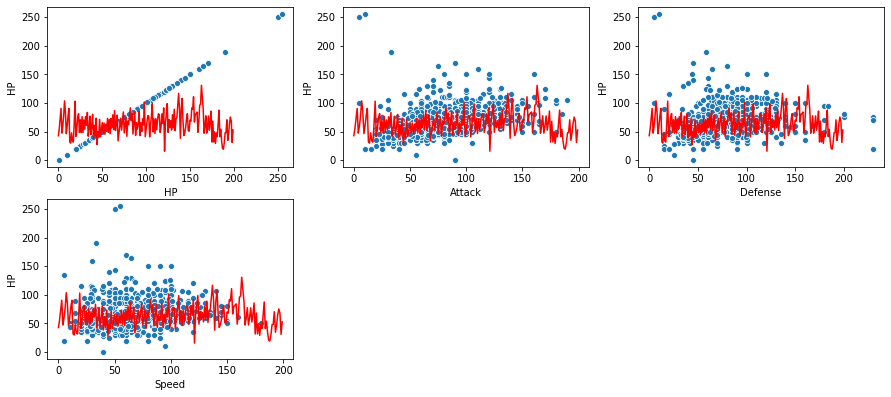

In [16]:
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(poke_stats):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=poke_df, x=i[1], y = 'HP')
    px = np.arange(0,200,1)
    bias = 20
    py = (sgdr.coef_[1] * atk[px]) + (sgdr.coef_[2] * dfs[px]) + (sgdr.coef_[3]*spd[px]) + sgdr.intercept_
    plt.plot(py, 'r')
    plt.show
    
#g(x) = 0.36384525*x_1 + 0.27076375*x_2 + 0.25237602*x_3 + 0.29716996

In [17]:
#print GD 
#print("Average Intercept ", sgdr.average_intercept_)
print("Intercept: ", sgdr.intercept_)
print("Iterations until Convergence: ", sgdr.n_iter_)
print("Learning Rate: 0.01")

Intercept:  [0.22666166]
Iterations until Convergence:  9
Learning Rate: 0.01


In [18]:
lgpred = sgdr.predict(x_train)
print("The Mean Absolute Error for the Training set is",
      metrics.mean_absolute_error(y_train, lgpred)) #Absolute error
print("The Mean Squared Error for the Training set is", 
      metrics.mean_squared_error(y_train, lgpred)) #MSE
print("The Root Mean Squared Error for the Training set is",
      np.sqrt(metrics.mean_squared_error(y_train,lgpred))) #RMSE

The Mean Absolute Error for the Training set is 16.76071195032745
The Mean Squared Error for the Training set is 711.8452488582042
The Root Mean Squared Error for the Training set is 26.680428198554164


In [19]:
lgpred = sgdr.predict(x_test)
print(lgpred)

[ 40.74596916  64.52657451  50.97566883  50.36865751  57.08054569
  71.45021119  40.34759035  42.82927187  44.38038743  89.40548313
  63.18720745  64.0428422   79.32998927  63.28519488  79.78743217
  62.0839098   75.38715258  67.08103515  97.4334884   74.8001919
  45.042723    62.49858247  62.11330163 111.1171247   71.56103308
  71.19223305  70.7488588  123.67117393  72.88169409  80.90542574
  77.66537614  56.93311916  82.03811521  61.33471626  52.13464771
  57.78082713  62.8936719  110.35145033  64.43847557  43.98601875
 119.64016176  74.50656966  95.61235076  94.75296938  49.75166758
  58.80340868  36.65420146  65.5577101   47.56770176  84.90044018
  49.29510867  45.02169826  91.79718054  91.20879193  72.38417358
  94.03736476  72.79357822  65.80847542  74.8001919   38.52317348
  87.73329342  50.30602697  46.70501743  52.76890897  31.88690676
  52.01661301  57.68541512  38.21947915  58.73927367  80.68405224
  64.27731366  58.78871277  58.48289348  62.74624537  42.61093104
  48.896916

In [20]:
print("The Mean Absolute Error for the Test set is",
      metrics.mean_absolute_error(y_test, lgpred)) #Absolute error
print("The Mean Squared Error for the Test set is",
      metrics.mean_squared_error(y_test, lgpred)) #MSE
print("The Root Mean Squared Error for the Test set is",
      np.sqrt(metrics.mean_squared_error(y_test,lgpred))) #RMSE

The Mean Absolute Error for the Test set is 14.879917829595204
The Mean Squared Error for the Test set is 431.42582846532133
The Root Mean Squared Error for the Test set is 20.770792677828194


In [21]:
print("The coefficients are: ", sgdr.coef_)

The coefficients are:  [0.22542887 0.37967277 0.26787341 0.24426647]
